# **Spaceship Titanic - Kaggle dataset**
---
### Competition description


    Welcome to the year 2912, where your data science skills 
    are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

    The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel 
    set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

    While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a 
    spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship 
    stayed intact, almost half of the passengers were transported to an alternate dimension!

    In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship 
    Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered 
    from the ship's damaged computer system.


----
### Data Description

***train.csv*** - Personal records for about two-thirds (8700) of the passengers, to be used as training data.

    *PassengerId* - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

    *HomePlanet* - The planet the passenger departed from, typically their planet of permanent residence.

    *CryoSleep* - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

    *Cabin* - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

    *Destination* - The planet the passenger will be debarking to.

    *Age* - The age of the passenger.

    *VIP* - Whether the passenger has paid for special VIP service during the voyage.

    *RoomService, FoodCourt, ShoppingMall, Spa, VRDeck* - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

    *Name* - The first and last names of the passenger.

    *Transported* - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

***test.csv*** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

***sample_submission.csv*** - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False

---


# Data and libraries uploading

In [ ]:
options(repr.plot.width=20, repr.plot.height=7)
options(warn=-1)

install.packages('naniar')
install.packages('qpcR')
install.packages("corrplot")
install.packages("lessR")
install.packages("wesanderson")

In [ ]:
library(visdat)
library(naniar)
library(ggplot2)
library(qpcR)
library(gridExtra)
library(dplyr) 
library(corrplot)
library(lessR)
library(wesanderson)

In [4]:
train = read.csv('train.csv',na.strings=c("","NA"))
test = read.csv('test.csv',na.strings=c("","NA"))

In [4]:
head(train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
2,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
3,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
4,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
5,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True
6,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True


Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


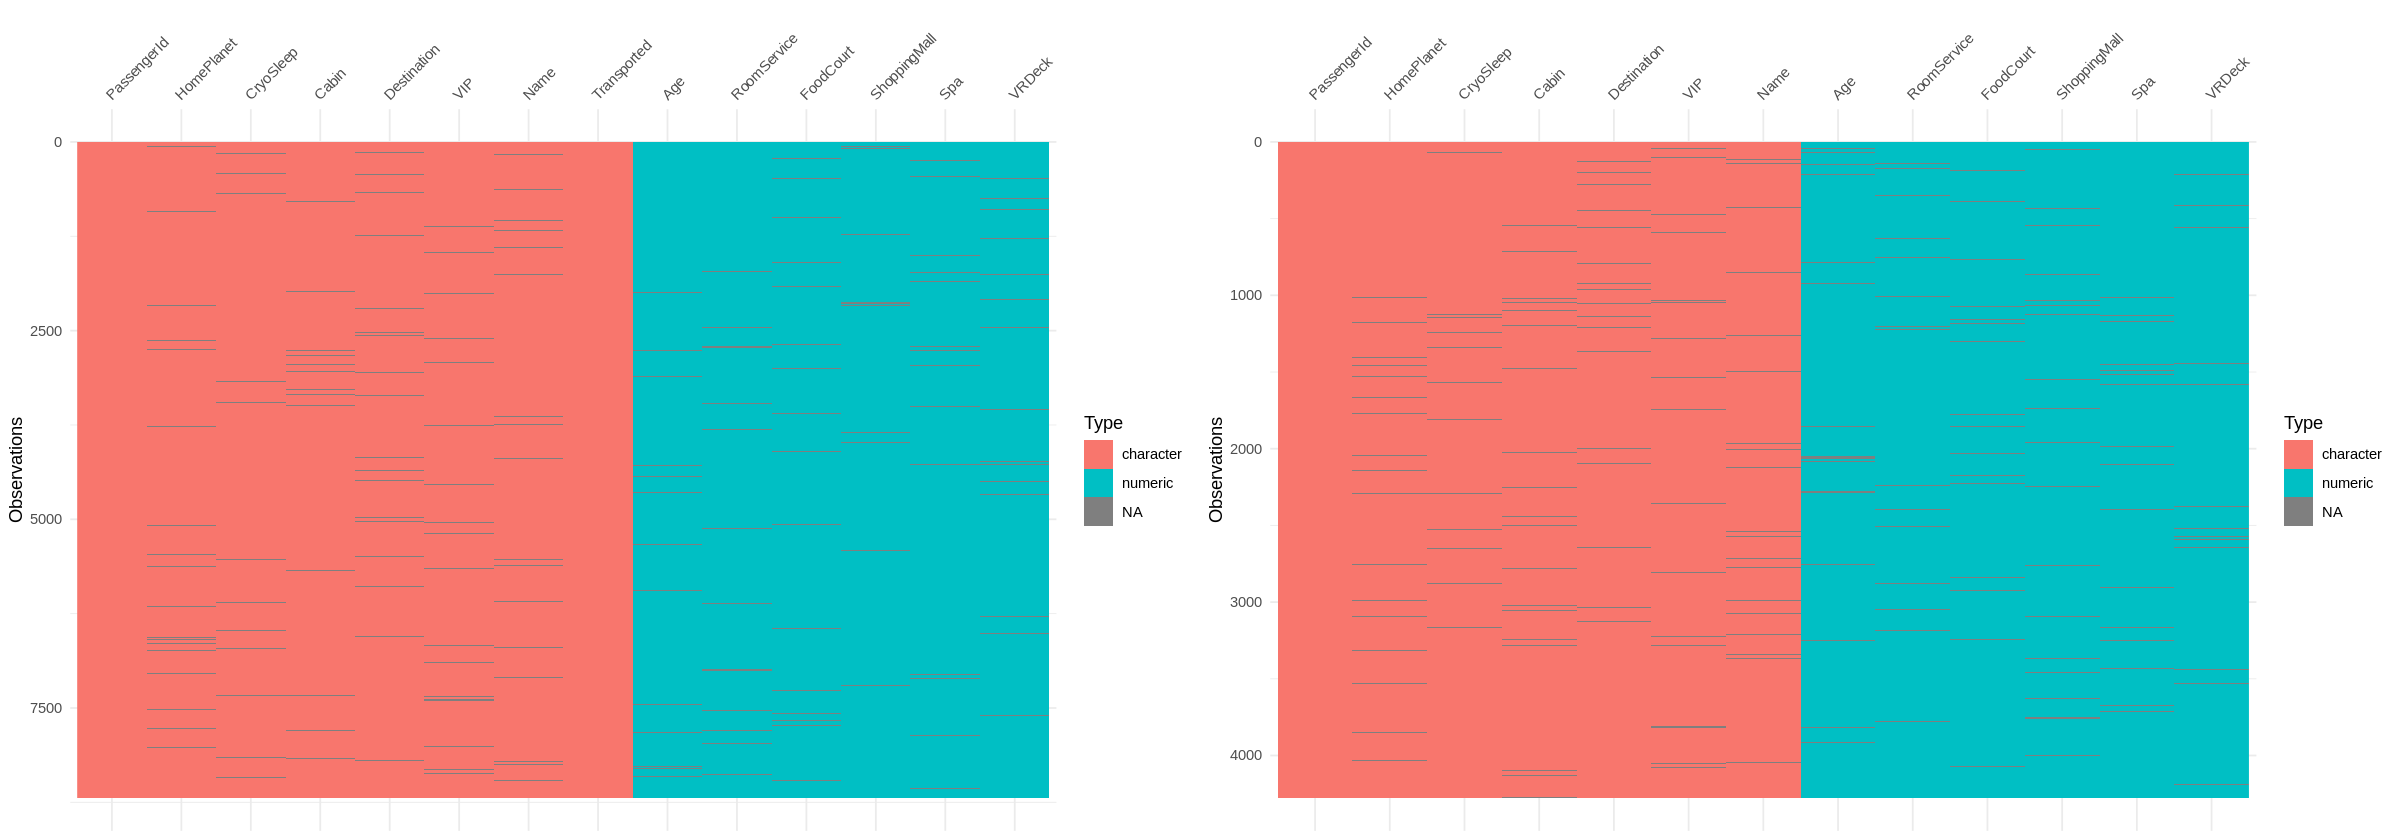

In [5]:
plot1 <- vis_dat(train)
plot2 <- vis_dat(test)
grid.arrange(plot1, plot2, ncol=2)

## Missing values

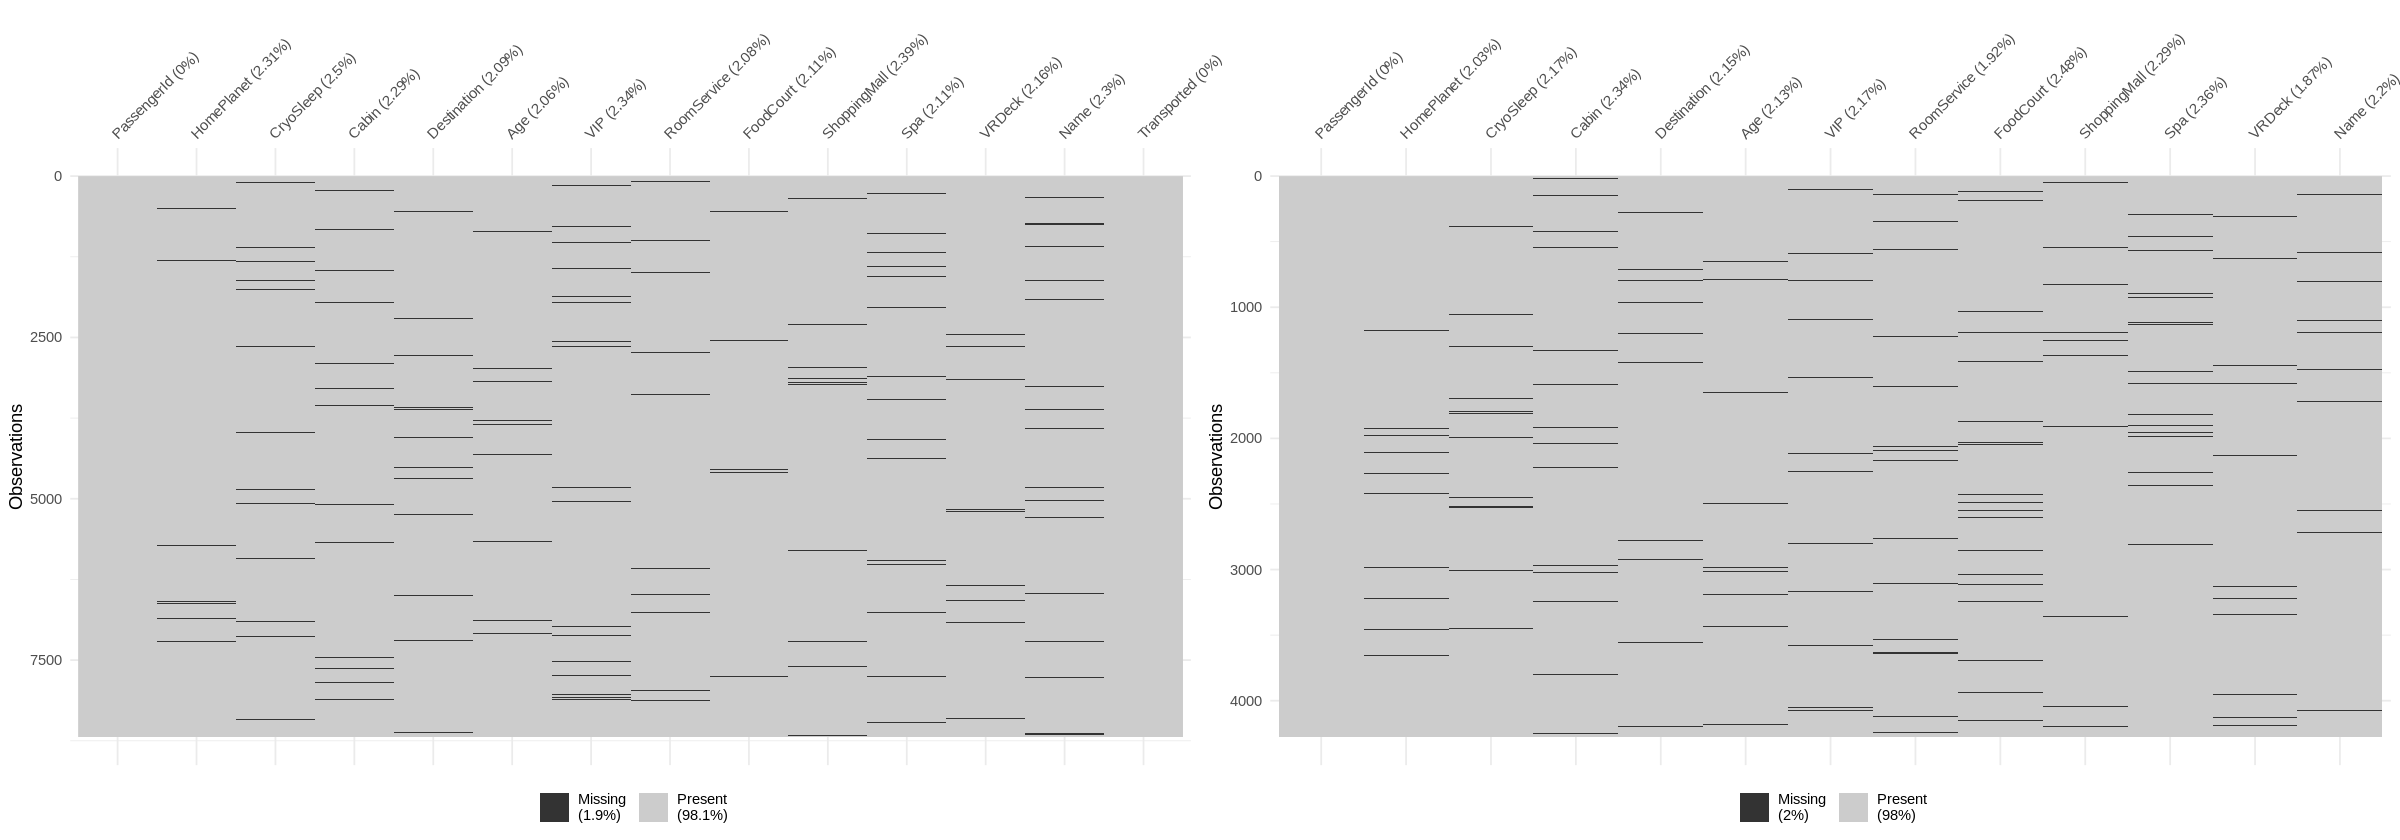

In [6]:
plot1 <- vis_miss(train)
plot2 <- vis_miss(test)
grid.arrange(plot1, plot2, ncol=2)

In [7]:
nans_train <- sapply(X = train, FUN = function(x) sum(is.na(x)))
nans_test <- sapply(X = test, FUN = function(x) sum(is.na(x)))
qpcR:::cbind.na(as.data.frame(nans_train),as.data.frame(nans_test))

,nans_train,nans_test
,<int>,<int>
PassengerId,0,0
HomePlanet,201,87
CryoSleep,217,93
Cabin,199,100
Destination,182,92
Age,179,91
VIP,203,93
RoomService,181,82
FoodCourt,183,106


There are few missing values in the data and seems like they don't have an obvious pattern

For building the baseline they could be filled with medians for categorical and boolean variables and with means for numerics

In further development they can be filled differently according to insights we will get from the data

---

# Target

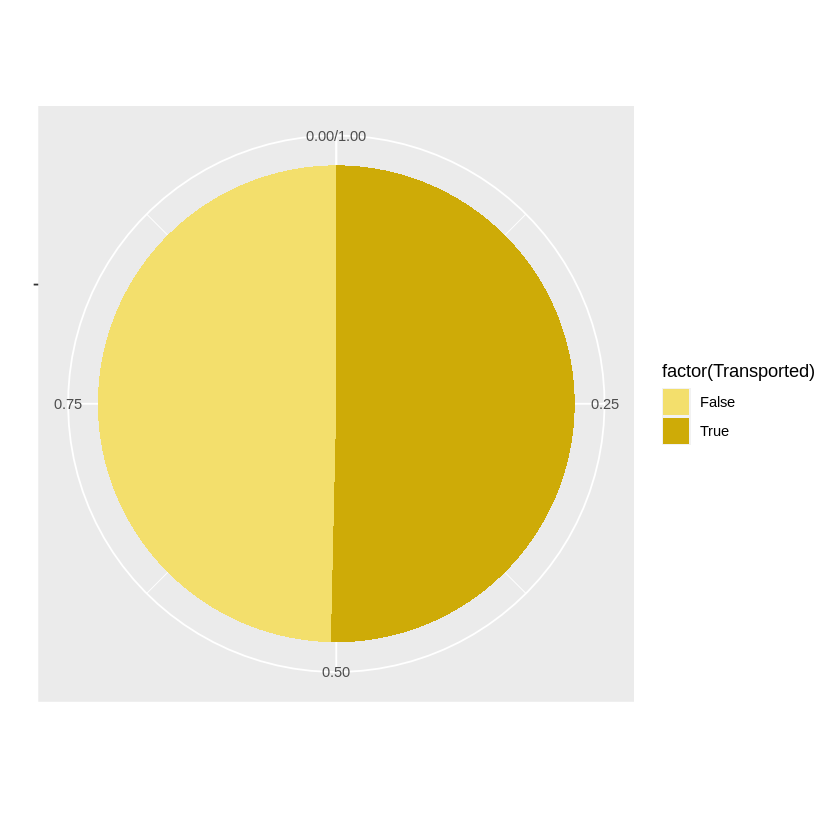

In [182]:
options(repr.plot.width=7, repr.plot.height=7)

ggplot(data=train, aes(x = "", fill = factor(Transported))) + 
  geom_bar(position = "fill", width = 1) + 
  scale_fill_manual(values=wes_palette(name="Moonrise1"))+
  coord_polar(theta = "y") + 
  xlab("") + 
  ylab("") 

# Numerics

## Age

Age is the first factor that comes to mind when the case is about saving people in catastrophe. It can be assumed that children and elderly people are more likely to be evacuated in such situation.

Let's check the distribution of ages in dataset and put target values upon that to test this hypothesis 

Warning message:
“Removed 179 rows containing non-finite values (stat_count).”


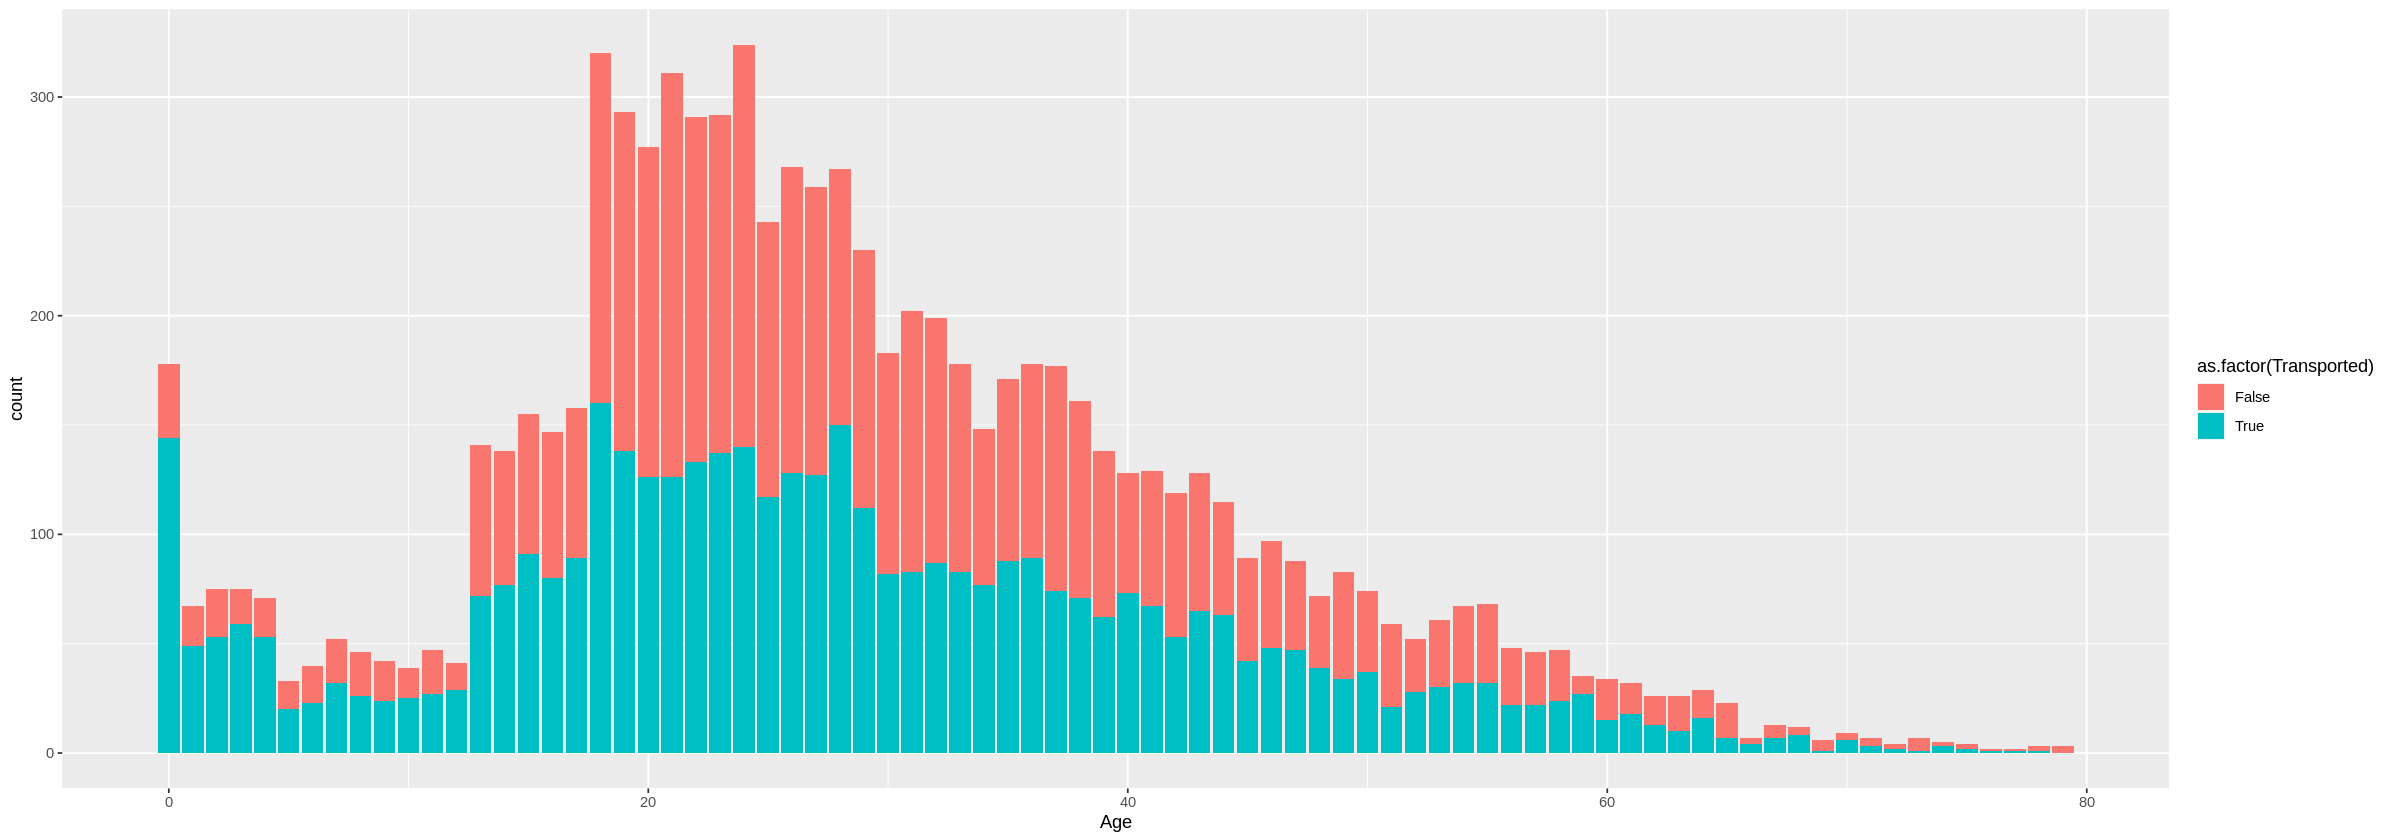

In [40]:
options(repr.plot.width=20, repr.plot.height=7)
ggplot(train,aes(x=Age, fill=as.factor(Transported))) +
geom_bar() +
labs(x="Age")

In [ ]:
options(repr.plot.width=7, repr.plot.height=7)
corrplot(corr,type = 'upper')

It is noticeable that the proportion of surviving passengers among children under 13 is indeed much higher. From the age of 14, this predominance is no longer so obvious - why?

Starting at age of 18, the proportions of surviving and non-surviving passengers become approximately equal, and even the elderly do not have a clear pattern in favor of being rescued. So the hypothesis turned out to be only half true.

---

## Expences

Here we have several features representing amount of money spent on different amentities such as *RoomService, FoodCourt, ShoppingMall, Spa* and  *VRDeck*

Let's check out their distribution 

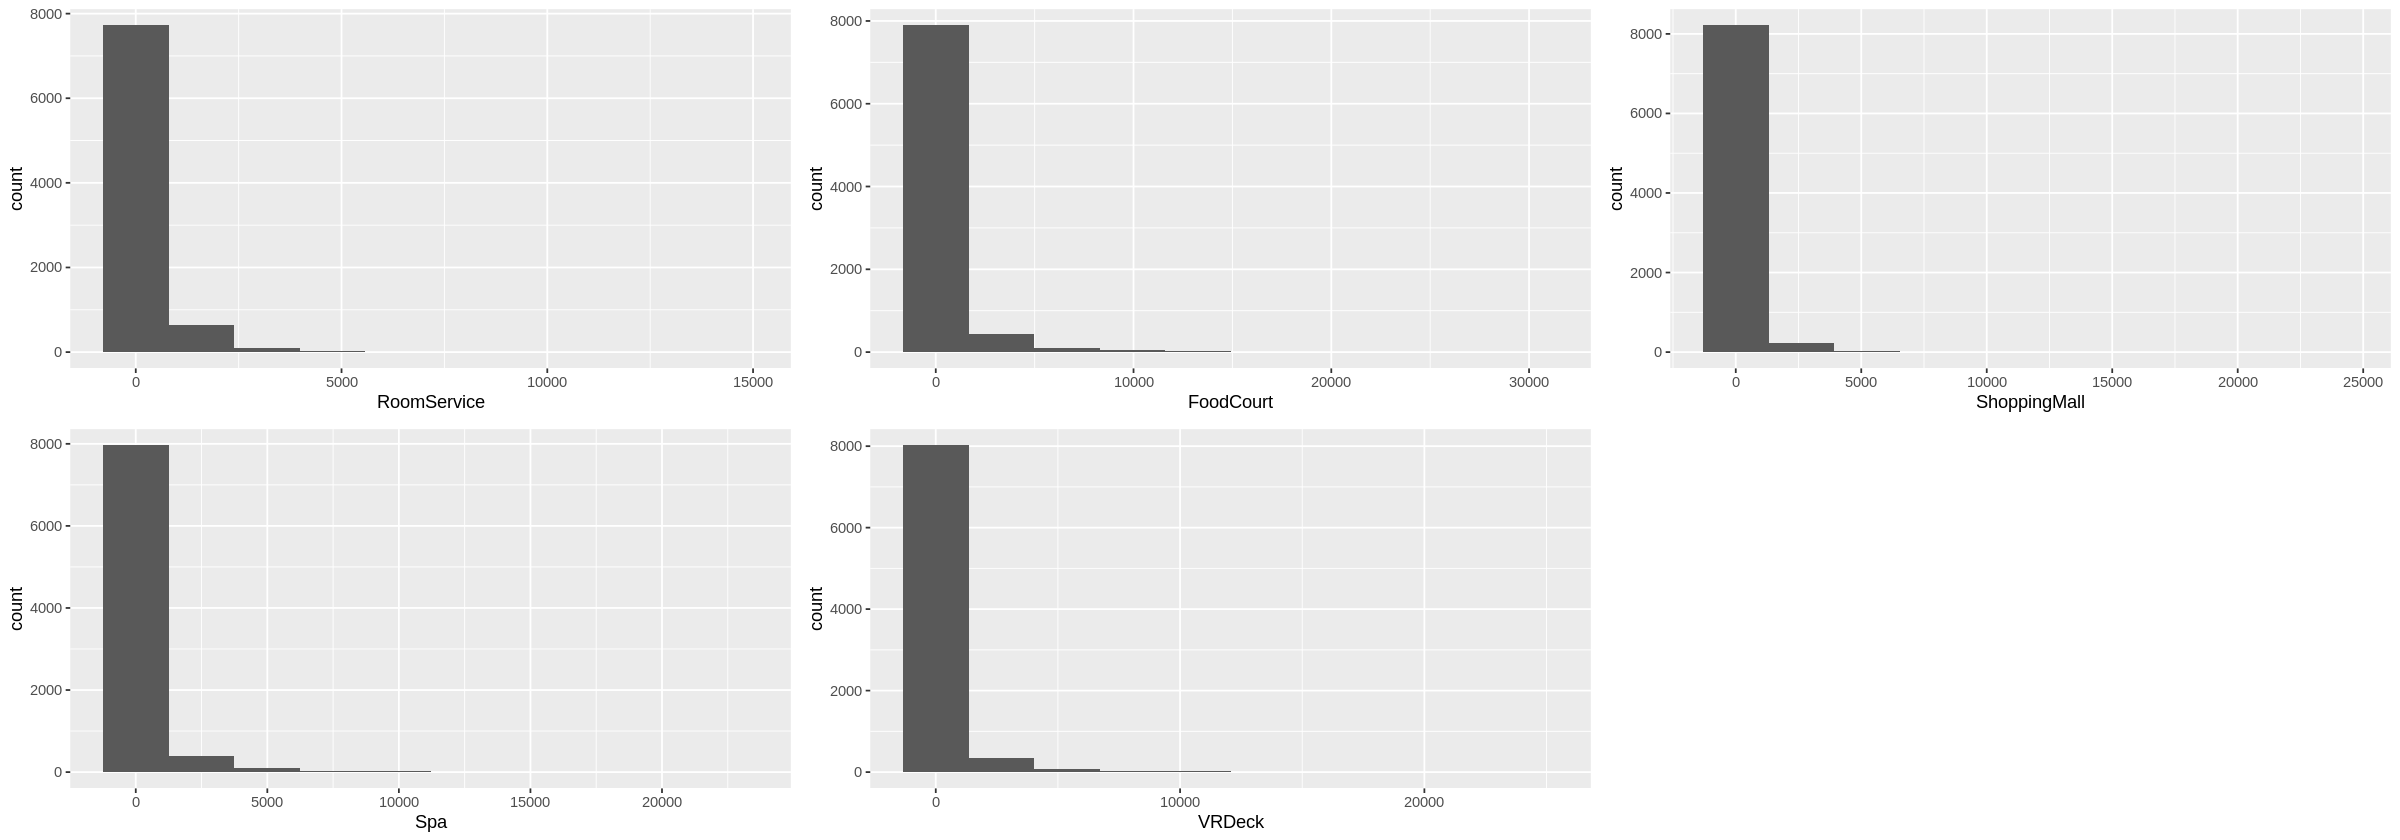

In [45]:
room <- ggplot(train,aes(x=RoomService)) + geom_histogram(bins = 10)
food <- ggplot(train,aes(x=FoodCourt)) + geom_histogram(bins = 10)
shops <- ggplot(train,aes(x=ShoppingMall)) + geom_histogram(bins = 10)
spa <- ggplot(train,aes(x=Spa)) + geom_histogram(bins = 10)
vrdeck <- ggplot(train,aes(x=VRDeck)) + geom_histogram(bins = 10)

grid.arrange(room,food,shops,spa,vrdeck, ncol=3,nrow=2)

Distributions of amentities features are pretty close to each other and we can see that there are lots of passengers who didn't spent any money during their trip. 

Let's make a correlation matrix to see if there are any dependencies between them all and the target

In [128]:
amentities <- data.frame(RoomService=train$RoomService,FoodCourt=train$FoodCourt,ShoppingMall=train$ShoppingMall,
Spa=train$Spa,VRDeck=train$VRDeck,transported =as.integer(as.logical(train$Transported)))
corr <- cor(amentities,use = "complete.obs")
corr

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,transported
RoomService,1.000000000,-0.01620439,0.055129139,0.009858203,-0.018251928,-0.24363821
FoodCourt,-0.016204390,1.00000000,-0.013133927,0.221767894,0.226065005,0.05067008
ShoppingMall,0.055129139,-0.01313393,1.000000000,0.016489705,-0.004490168,0.00769300
Spa,0.009858203,0.22176789,0.016489705,1.000000000,0.146568539,-0.22152030
VRDeck,-0.018251928,0.22606501,-0.004490168,0.146568539,1.000000000,-0.20755073
transported,-0.243638213,0.05067008,0.007693000,-0.221520300,-0.207550729,1.00000000


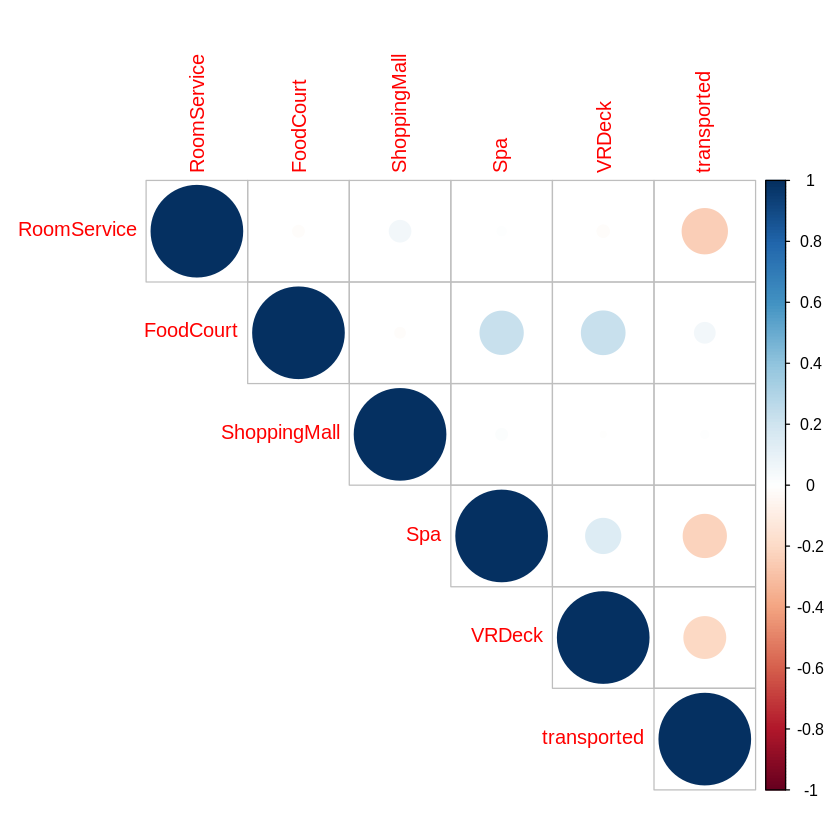

In [186]:
options(repr.plot.width=7, repr.plot.height=7)
corrplot(corr,type = 'upper')

There are no strong correlations between numeric variables and they have no strong impact on target variable

Now let's summarize all amentities columns into *Expences* and see how the target is distributed across them

In [17]:
train$Expences <- apply(train[,c('RoomService','FoodCourt','ShoppingMall','Spa','VRDeck')], 1, sum)
head(train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expences
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,0
2,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,736
3,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,10383
4,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,5176
5,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,1091
6,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,774


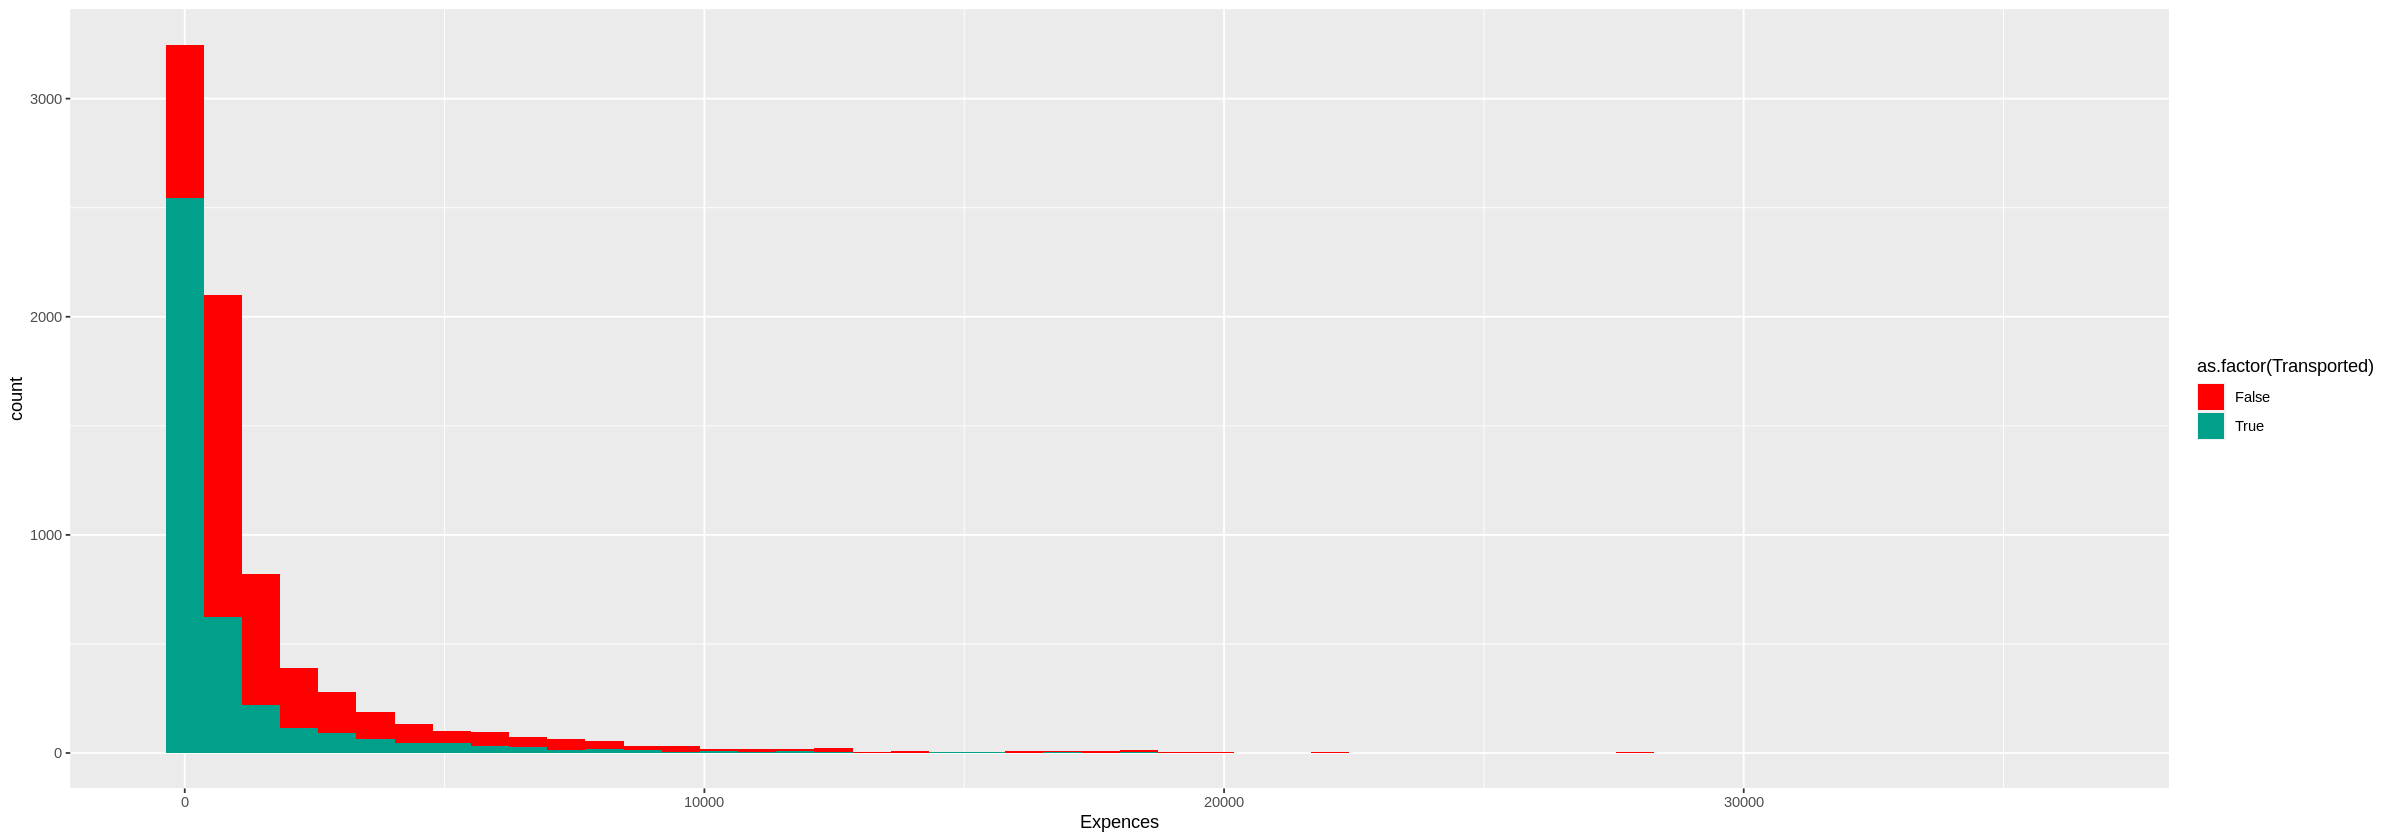

In [191]:
options(repr.plot.width=20, repr.plot.height=7)
ggplot(train,aes(x=Expences, fill=as.factor(Transported))) + geom_histogram(bins = 50)+scale_fill_manual(values=wes_palette(n=3, name="Darjeeling1"))

So now we can see that zero spending is the important feature - a big percentage of passengers who didn't spend money during travel were saved. 

If passenger didn't spend any money, we can assume that he/she was in cryo sleep or underaged. 

This hypothesis is confirmed in the next cell

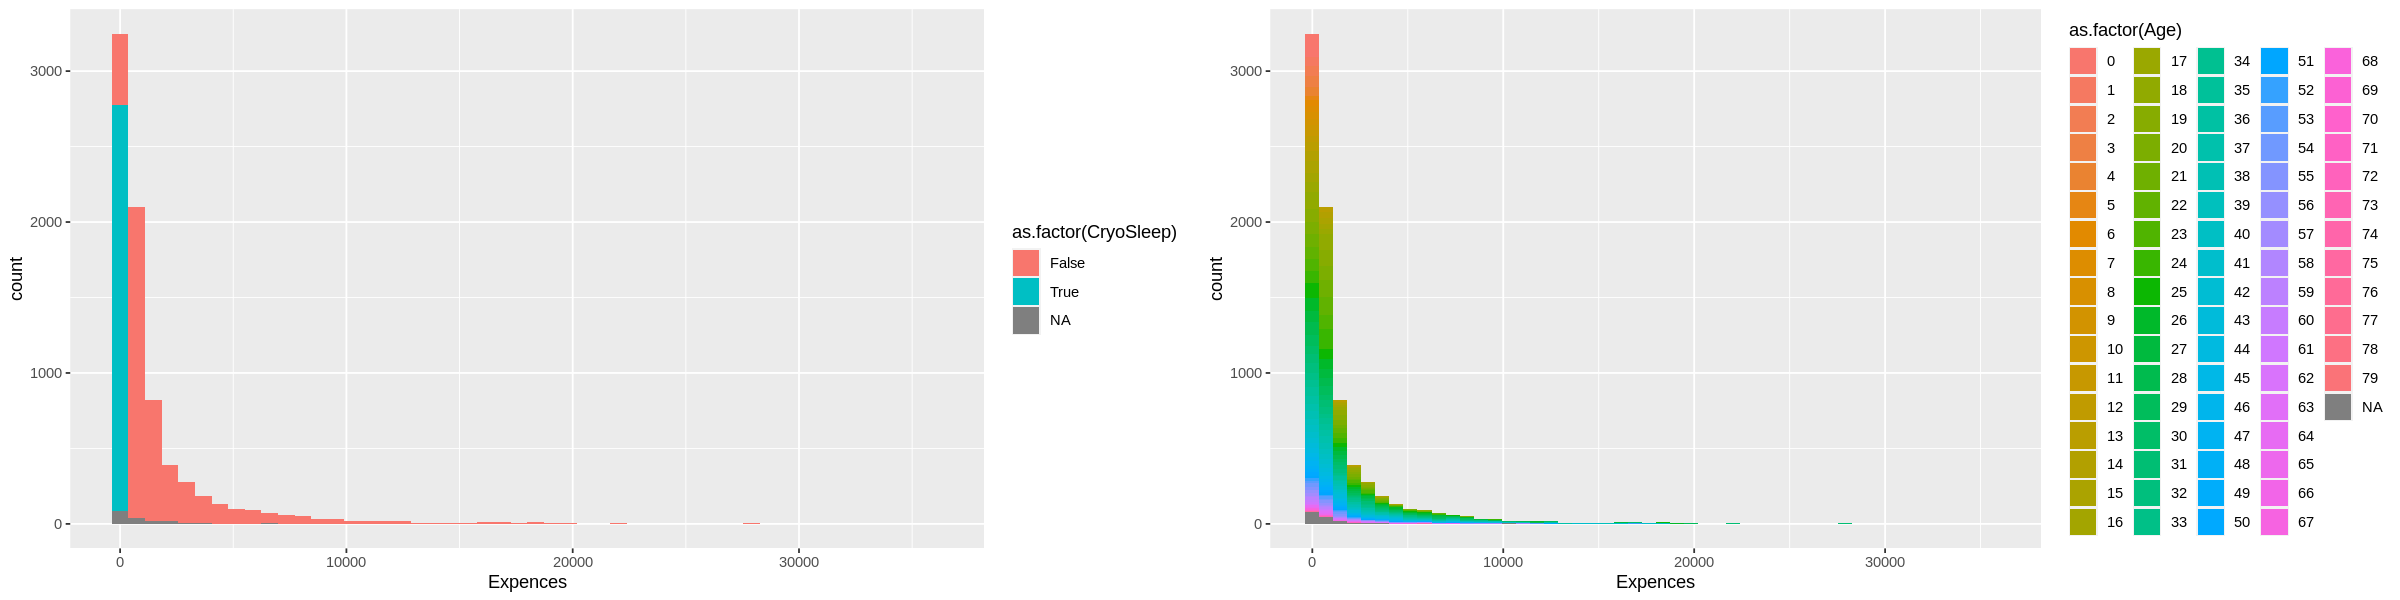

In [146]:
options(repr.plot.width=20, repr.plot.height=5)
plot1 <- ggplot(train,aes(x=Expences, fill=as.factor(CryoSleep))) + geom_histogram(bins = 50)
plot2 <- ggplot(train,aes(x=Expences, fill=as.factor(Age))) + geom_histogram(bins = 50)
grid.arrange(plot1,plot2, ncol=2)

*CryoSleep* and zero spending should have very strong correlation as well as small age with zero spending. 

Previously we saw that passengers with Age <= 13 are more likely to be saved. As for CryoSleep, it can be assumed that if zero spending is strongly assotiated with being saved then CryoSleep could be too. We will test this hypothesis in the further analysis.

---

# Categoricals

## Home Planet

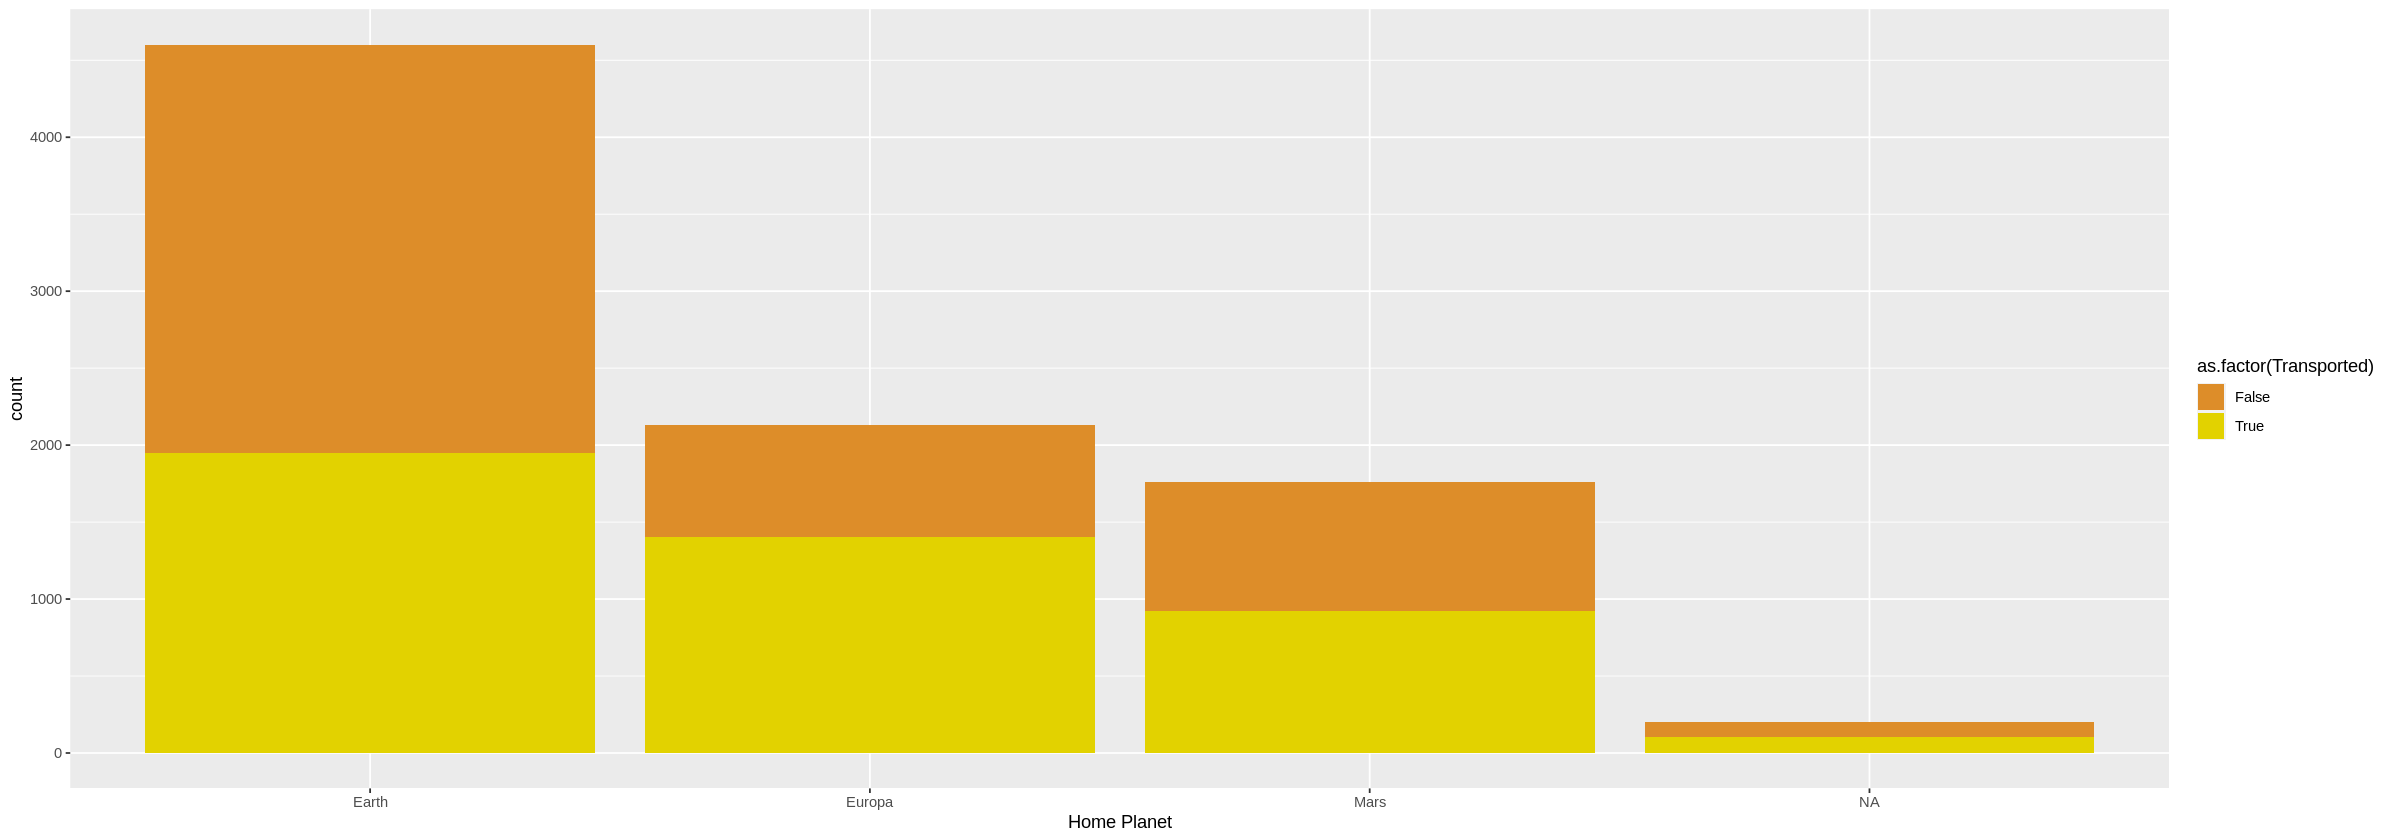

In [193]:
ggplot(train,aes(x=as.factor(HomePlanet), fill=as.factor(Transported))) +
geom_bar() +
scale_fill_manual(values=wes_palette(n=3, name="FantasticFox1")) +
labs(x="Home Planet")

Distribuion pattern is pretty similar across different home planets. Also, seems like passengers origin isn't associated with being saved

In general, we can see that earthlings are dominant among all passengers

---

## CryoSleep

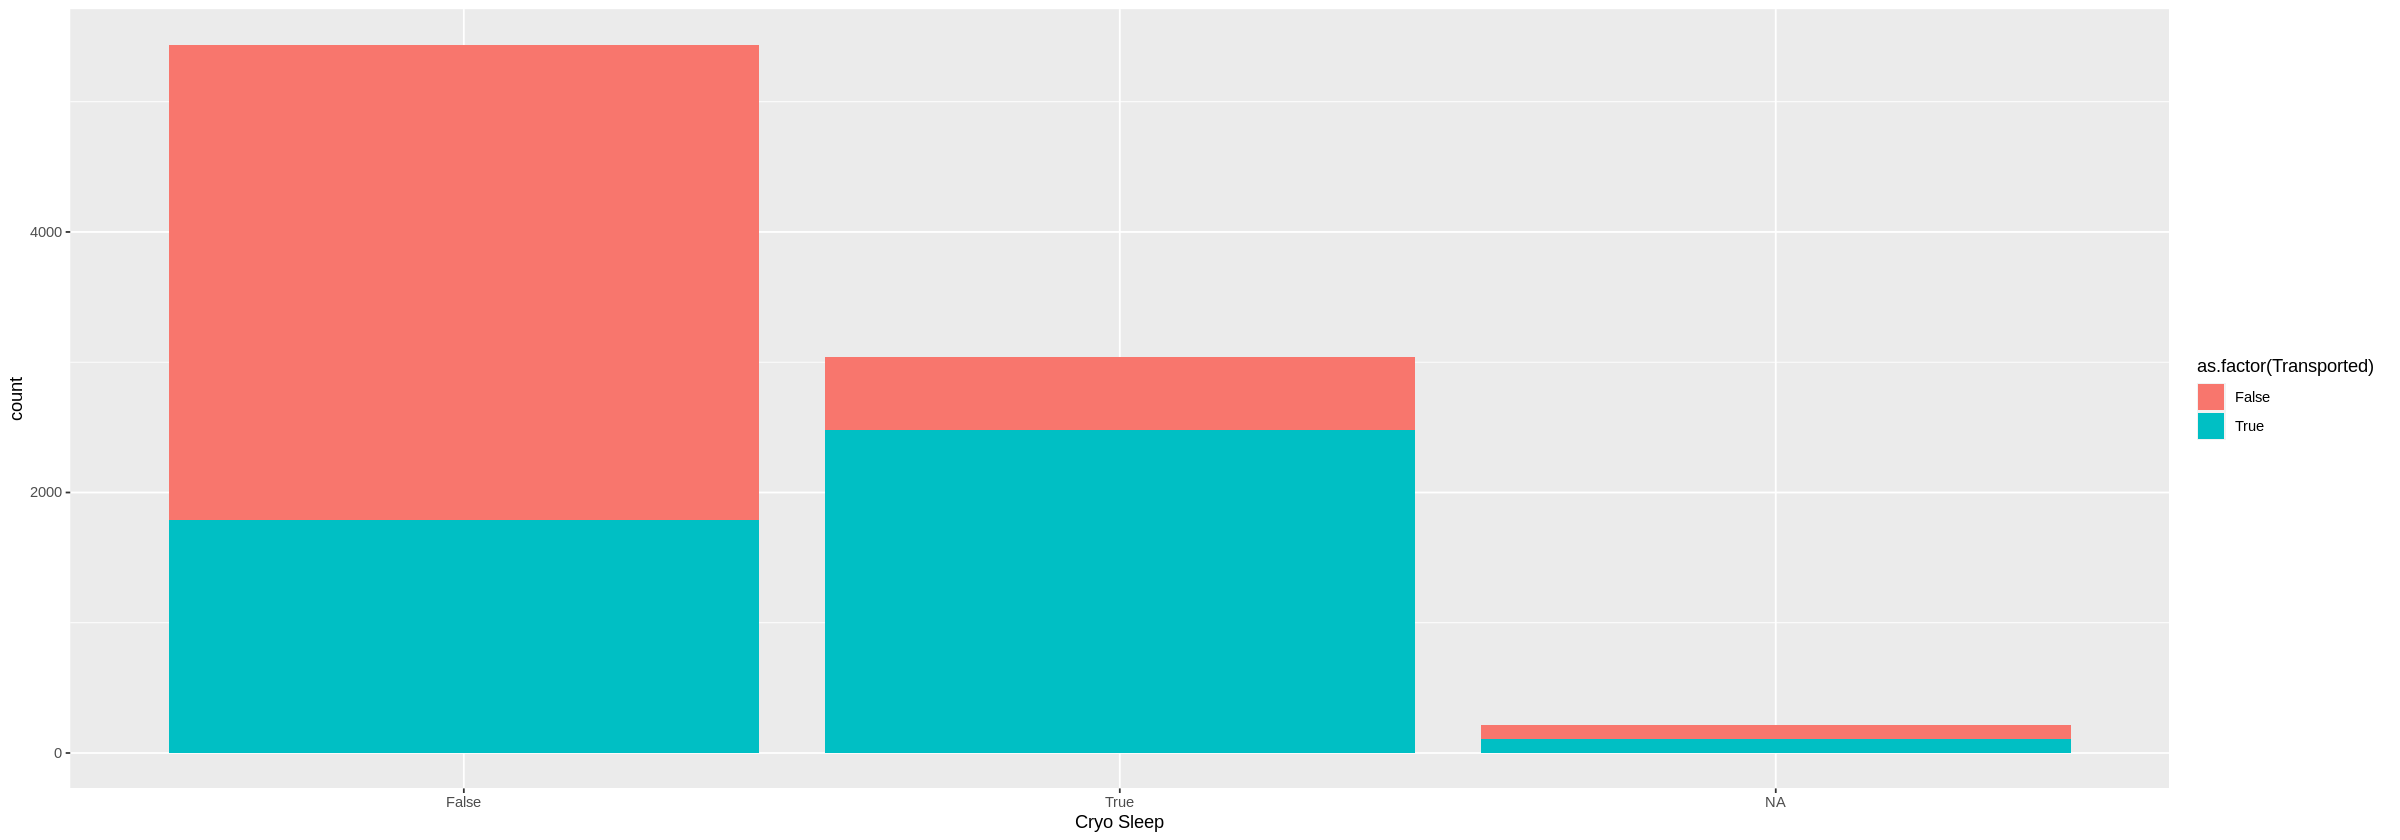

In [10]:
ggplot(train,aes(x=as.factor(CryoSleep), fill=as.factor(Transported))) +
geom_bar() +
labs(x="Cryo Sleep")

Passengers with different CryoSleep status are having different target distribution as well: the percentage of saved passengers who slept during travel is greater than of those who refused to do so

It's interesting why. Since the dataset is fantastic, we can only guess what the creators of the competition had in mind. Probably, the thing is in the durable material and autonomy of cryo capsules

---

## Cabin

In [11]:
# Количество уникальных значений в поле Cabin
length(unique(train$Cabin))

[1] 6561


Most of values in Cabin column are unique

We know that values there are having *deck/num/side* pattern and it can be assumed that the number of decks on the ship will not be that much, and the individual cabin numbers can most likely be neglected. We also know from the description of the data that there are only two side values

Let's try to convert the Cabin column into three separate features and look at their distributions


In [12]:
train$Cabin[1]

[1] "B/0/P"

In [13]:
train_cab <- data.frame(do.call('rbind', strsplit(as.character(train$Cabin),'/',fixed=TRUE)))
test_cab <- data.frame(do.call('rbind', strsplit(as.character(test$Cabin),'/',fixed=TRUE)))
colnames(train_cab) <- c('deck','num','side')
colnames(test_cab) <- c('deck','num','side')

train <- cbind(train,train_cab)
train <- train[ , ! names(train) %in% 'Cabin']
test <- cbind(test,test_cab)
test <- test[ , ! names(test) %in% 'Cabin']

In [14]:
head(train)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0001_01,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
2,0002_01,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
3,0003_01,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
4,0003_02,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
5,0004_01,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
6,0005_01,Earth,False,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P


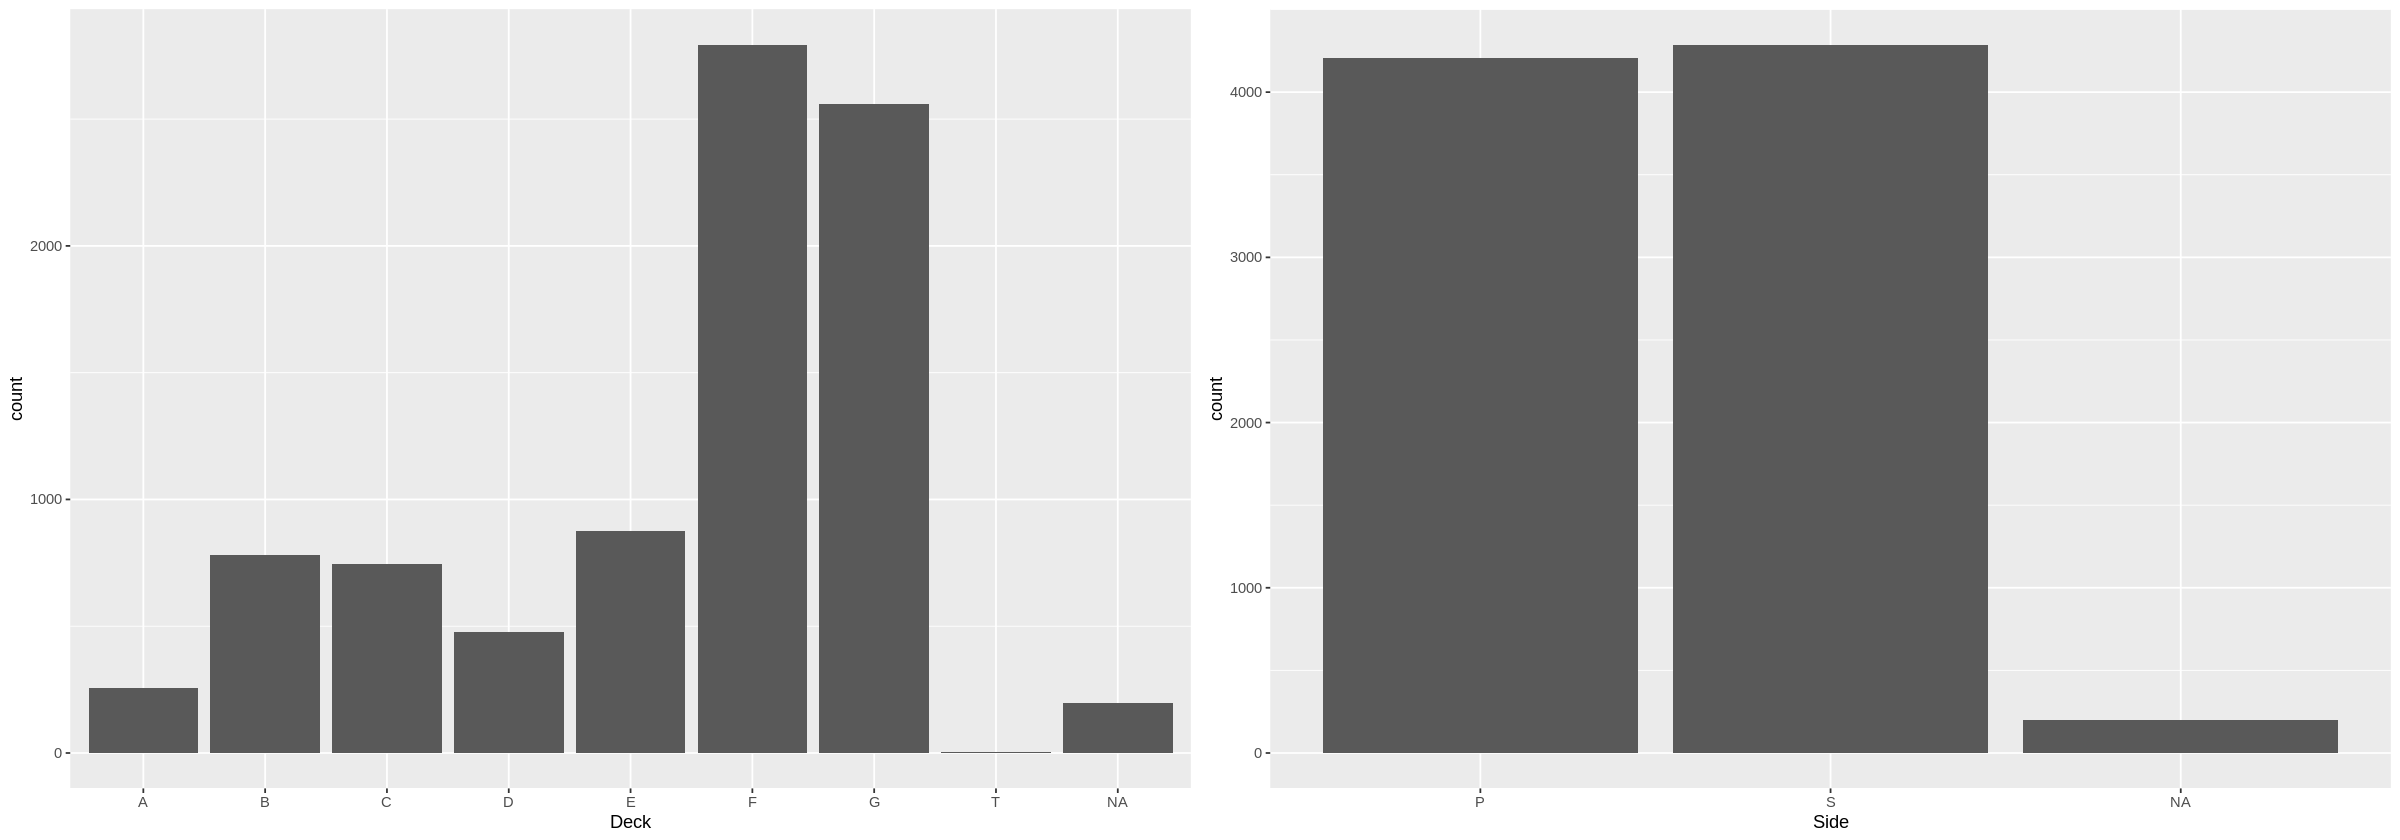

In [15]:
plot1 <- ggplot(train,aes(x=as.factor(deck))) + geom_bar() + labs(x="Deck")
plot2 <- ggplot(train,aes(x=as.factor(side))) + geom_bar() + labs(x="Side")
grid.arrange(plot1, plot2, ncol=2)


Obviously, in the Deck variable, most of the passengers are living on decks F and G. It's not clear yet what this may be related to. Checking the distribution of different passengers on decks should be helpful, perhaps there is some explanation

There is nothing interesting in the Side variable yet, passengers are placed on different sides of the cabins approximately equally with a slight predominance of S.


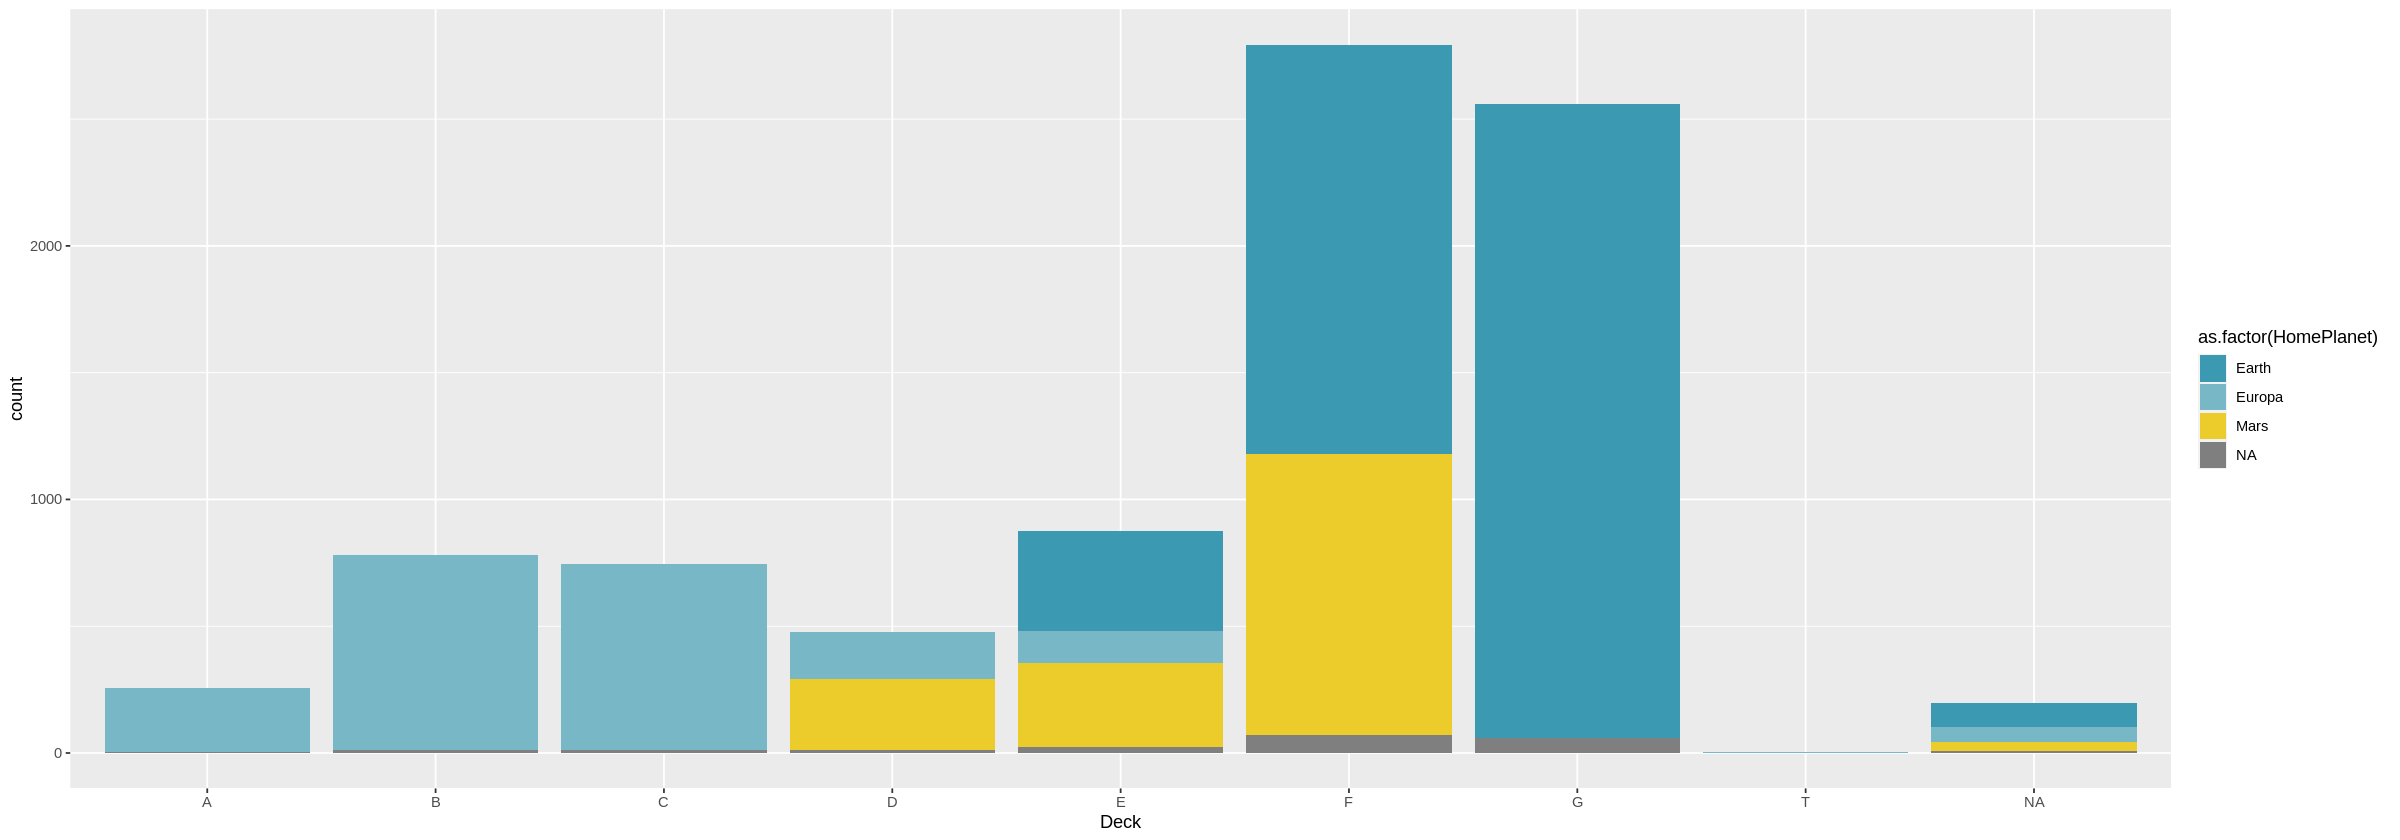

In [195]:
ggplot(train,aes(x=as.factor(deck), fill=as.factor(HomePlanet))) + 
geom_bar() +
scale_fill_manual(values=wes_palette(n=3, name="Zissou1")) +
labs(x="Deck")

Now it’s clear why decks F and G are so numerous: most of passengers there are the earthlings, whose percentage among all passengers is also the greatest

Let's also check if there are any dependencies in the distribution of target on different decks and sides of cabins. It can be assumed that the richer passengers (first classes) or those who were vigilant and relatively close to the point of destruction, would be saved faster than others.


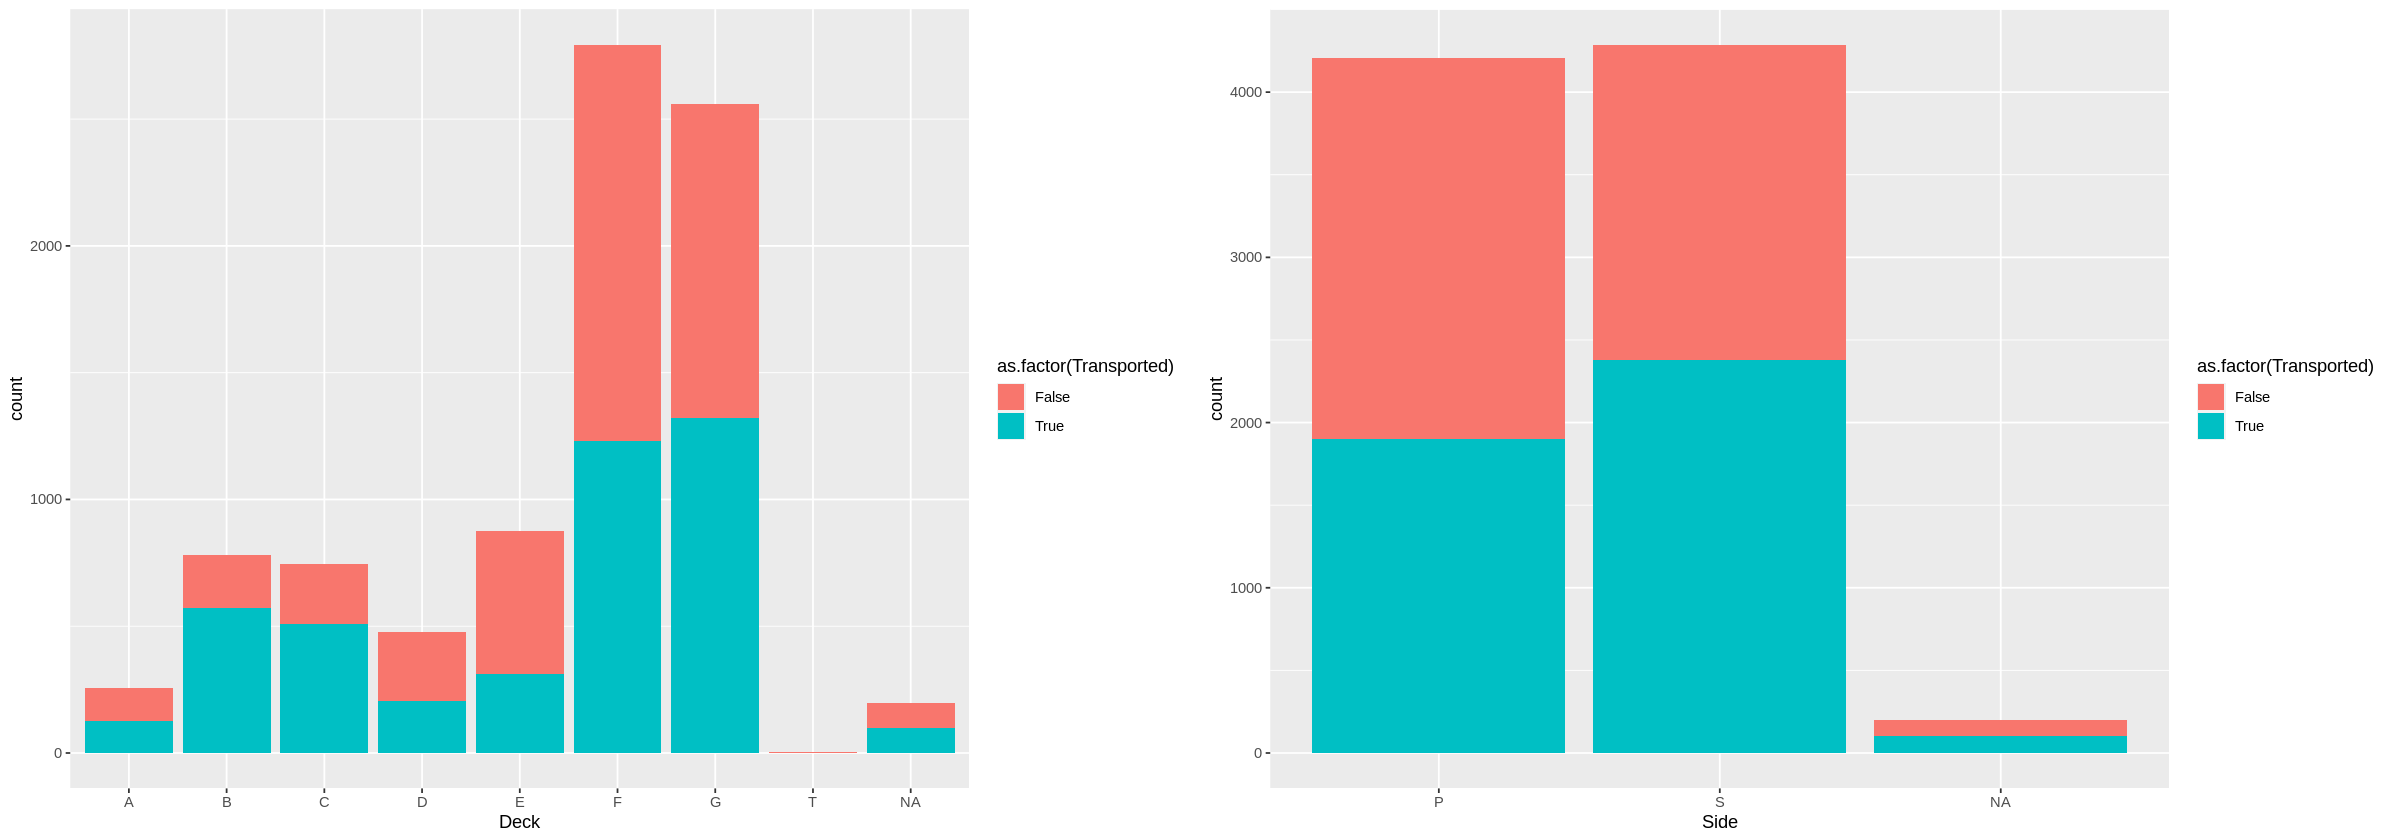

In [17]:
plot1 <- ggplot(train,aes(x=as.factor(deck), fill=as.factor(Transported))) + geom_bar() + labs(x="Deck")
plot2 <- ggplot(train,aes(x=as.factor(side), fill=as.factor(Transported))) + geom_bar() + labs(x="Side")
grid.arrange(plot1, plot2, ncol=2)

Seems like there is no obvious pattern here: somewhere the percentage of saved ones is higher, somewhere is lower, but in general, the target distribution across all cabins is approximately 50/50 

Nevertheless, among all decks, the proportion of surviving passengers is higher in B and C, and vice versa, deck E has the worst results. These results may be related to one of the hypotheses mentioned in the comment above

---

## Destination

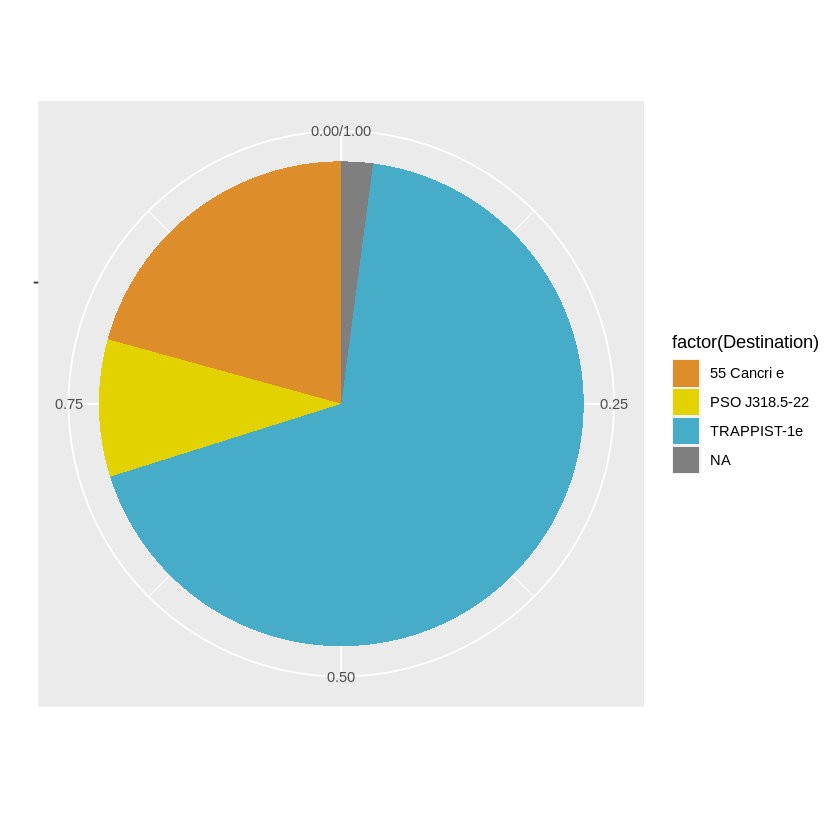

In [20]:
options(repr.plot.width=7, repr.plot.height=7)

ggplot(data=train, aes(x = "", fill = factor(Destination))) + 
  geom_bar(position = "fill", width = 1) + 
  scale_fill_manual(values=wes_palette(name="FantasticFox1"))+
  coord_polar(theta = "y") + 
  xlab("") + 
  ylab("") 


The most popular destination is TRAPPIST-1e 

Nothing interesting here

## VIP

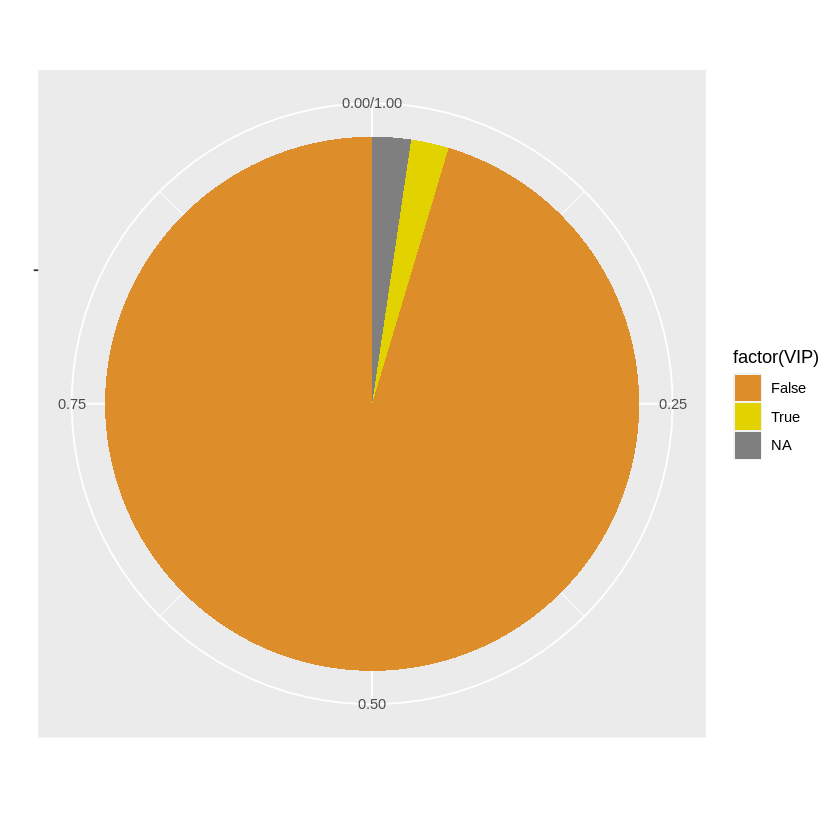

In [21]:
ggplot(data=train, aes(x = "", fill = factor(VIP))) + 
  geom_bar(position = "fill", width = 1) + 
  scale_fill_manual(values=wes_palette(name="FantasticFox1"))+
  coord_polar(theta = "y") + 
  xlab("") + 
  ylab("") 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



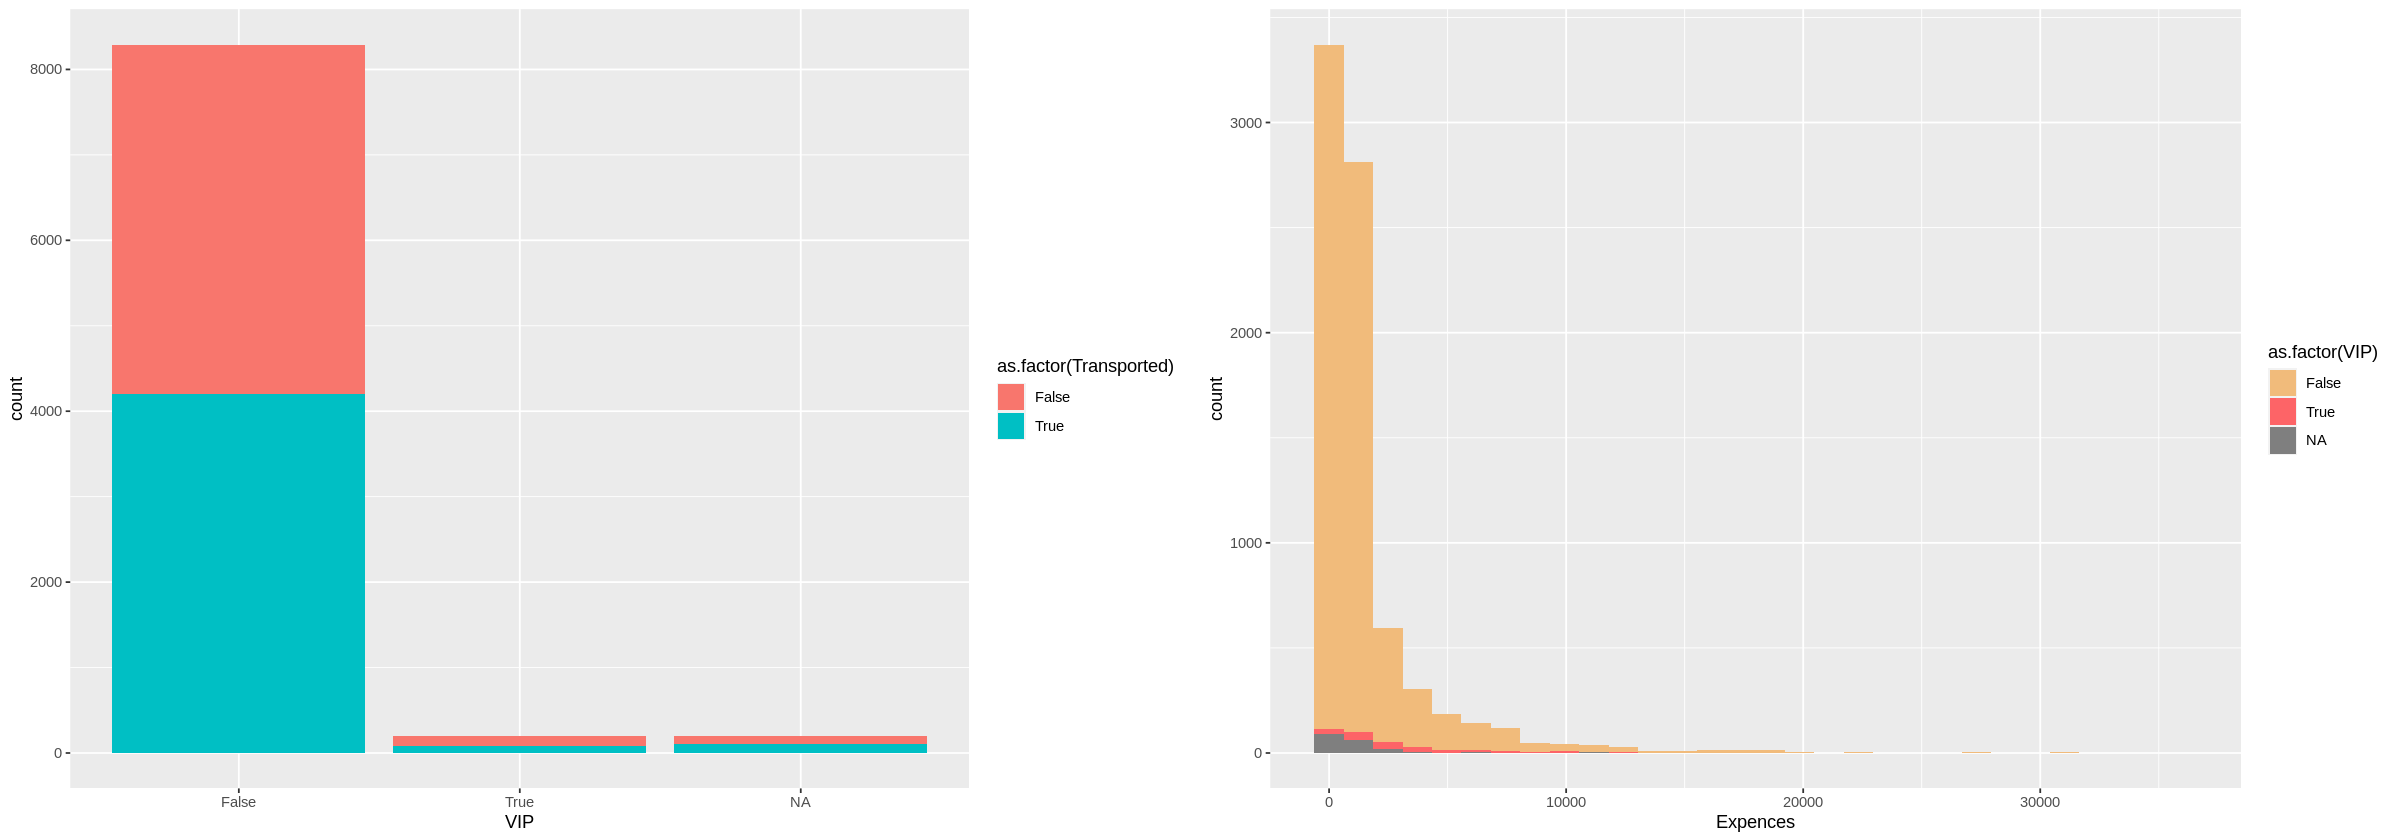

In [28]:
options(repr.plot.width=20, repr.plot.height=7)

plot1 <- ggplot(train,aes(x=as.factor(VIP), fill=as.factor(Transported))) + geom_bar() + labs(x="VIP")
plot2 <- ggplot(train,aes(x=Expences, fill=as.factor(VIP))) + geom_histogram() + scale_fill_manual(values=wes_palette(name="GrandBudapest1"))
grid.arrange(plot1, plot2, ncol=2)

Most of pasengers didn't have VIP status

Expences are not associated with VIP status for some reason

No predominance of target values in either VIP or non-VIP status

# Conclusion

**Based on the results of the EDA, several conclusions can be drawn:**

1. Data quality is quite good, there are few missing values, there are no strongly cross-correlated features, no  dimensionality reduction  is required

2. Important survival factors are *Age* under 13 and *CryoSleep* (and indirectly, zero expenses). In further predictive model building, it is possible that the splitting zero spending in a separate categorical column could improve the prediction resuls a bit

3. *Names* weren't considered in this analysis, but in further work on this dataset, it would be interesting to build a model (NLP?) that determines the gender of the passenger and test the hypothesis that preference will be given to women during evacuation
